### Project 2: Facial Recognition using Eigenfaces
#### Objective: A conceptual project to understand the Eigenfaces concept. 
#### Technique: Load multiple grayscale face images, flatten each into a vector, stack them into a matrix, find the eigenvectors of the covariance matrix, and visualize the top few eigenvectors as "eigenfaces." 

In [3]:
! pip install kagglehub pillow matplotlib numpy


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import kagglehub

# ---------------------------------------------------
# 1. Download AT&T / Olivetti Face Dataset from Kaggle
# ---------------------------------------------------
path = kagglehub.dataset_download("kasikrit/att-database-of-faces")
print("Dataset downloaded to:", path)
# ---------------------------------------------------
# 2. Load and preprocess images
# ---------------------------------------------------
images = []
image_size = (100, 100)

for person in os.listdir(path):
    person_path = os.path.join(path, person)
    if os.path.isdir(person_path):
        for file in os.listdir(person_path):
            if file.endswith(".pgm"):
                img_path = os.path.join(person_path, file)
                img = Image.open(img_path).convert("L")
                img = img.resize(image_size)
                images.append(np.array(img))
    

images = np.array(images)
print("Total images loaded:", images.shape[0])

# .convert('L') → converts to grayscale (1 channel).
# .resize((100, 100)) → makes every image 100×100 pixels so that shapes match.



Dataset downloaded to: C:\Users\ADMIN\.cache\kagglehub\datasets\kasikrit\att-database-of-faces\versions\2
Total images loaded: 400


In [6]:
import numpy as np
# ---------------------------------------------------
# 3. Convert images to data matrix
# ---------------------------------------------------
data = np.array([img.flatten() for img in images])
print("Data shape:", data.shape)  # (num_images, 10000)

# Each image is stored as a NumPy array (matrix of pixel values)
# Each image (100×100) is flattened into a 1D vector of length 10,000.
# if you have 400 images, shape = (400, 10000)
# → meaning 400 samples, each having 10,000 pixel features.

Data shape: (400, 10000)


In [7]:
import numpy as np
# ---------------------------------------------------
# 4. Mean face and centering
# ---------------------------------------------------
mean_face = np.mean(data, axis=0)
centered_data = data - mean_face

# The mean face is the average of all faces pixel-by-pixel.
# Subtracting it centers the data around zero
# It removes common features (lighting, background) to highlight variations

# ---------------------------------------------------
# 5. Covariance matrix and Eigen decomposition
# ---------------------------------------------------
cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# calculate how pixel values vary together → covariance matrix.
# This matrix helps PCA(principal component analysis) find directions (patterns) of maximum variation
# rowvar=False - When doing PCA, we need the covariance matrix to describe relationships between features, not between rows
# Which pixel combinations carry the most information
# Each eigenvector = an Eigenface, a pattern of variation in the faces.
# Each eigenvalue = how important that Eigenface is (variance captured)
# np.linalg.eigh() finds eigenvalues and eigenvectors

# Sort eigenvalues and eigenvectors
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# PCA finds eigenvectors (directions of most variation).
# Keeps the most important axes (those with largest eigenvalues) first.
# [::-1] → reverses that order to descending
# [:, idx] - : → means “all rows” (i.e., the full eigenvector values), idx → selects columns in the new order

# ---------------------------------------------------
# 6. Select top Eigenfaces
# ---------------------------------------------------
top_k = 50
eigenfaces = eigenvectors[:, :top_k]

# Take only the first 6 eigenvectors
# These top components preserve the most important information —the rest can be discarded to compress the image



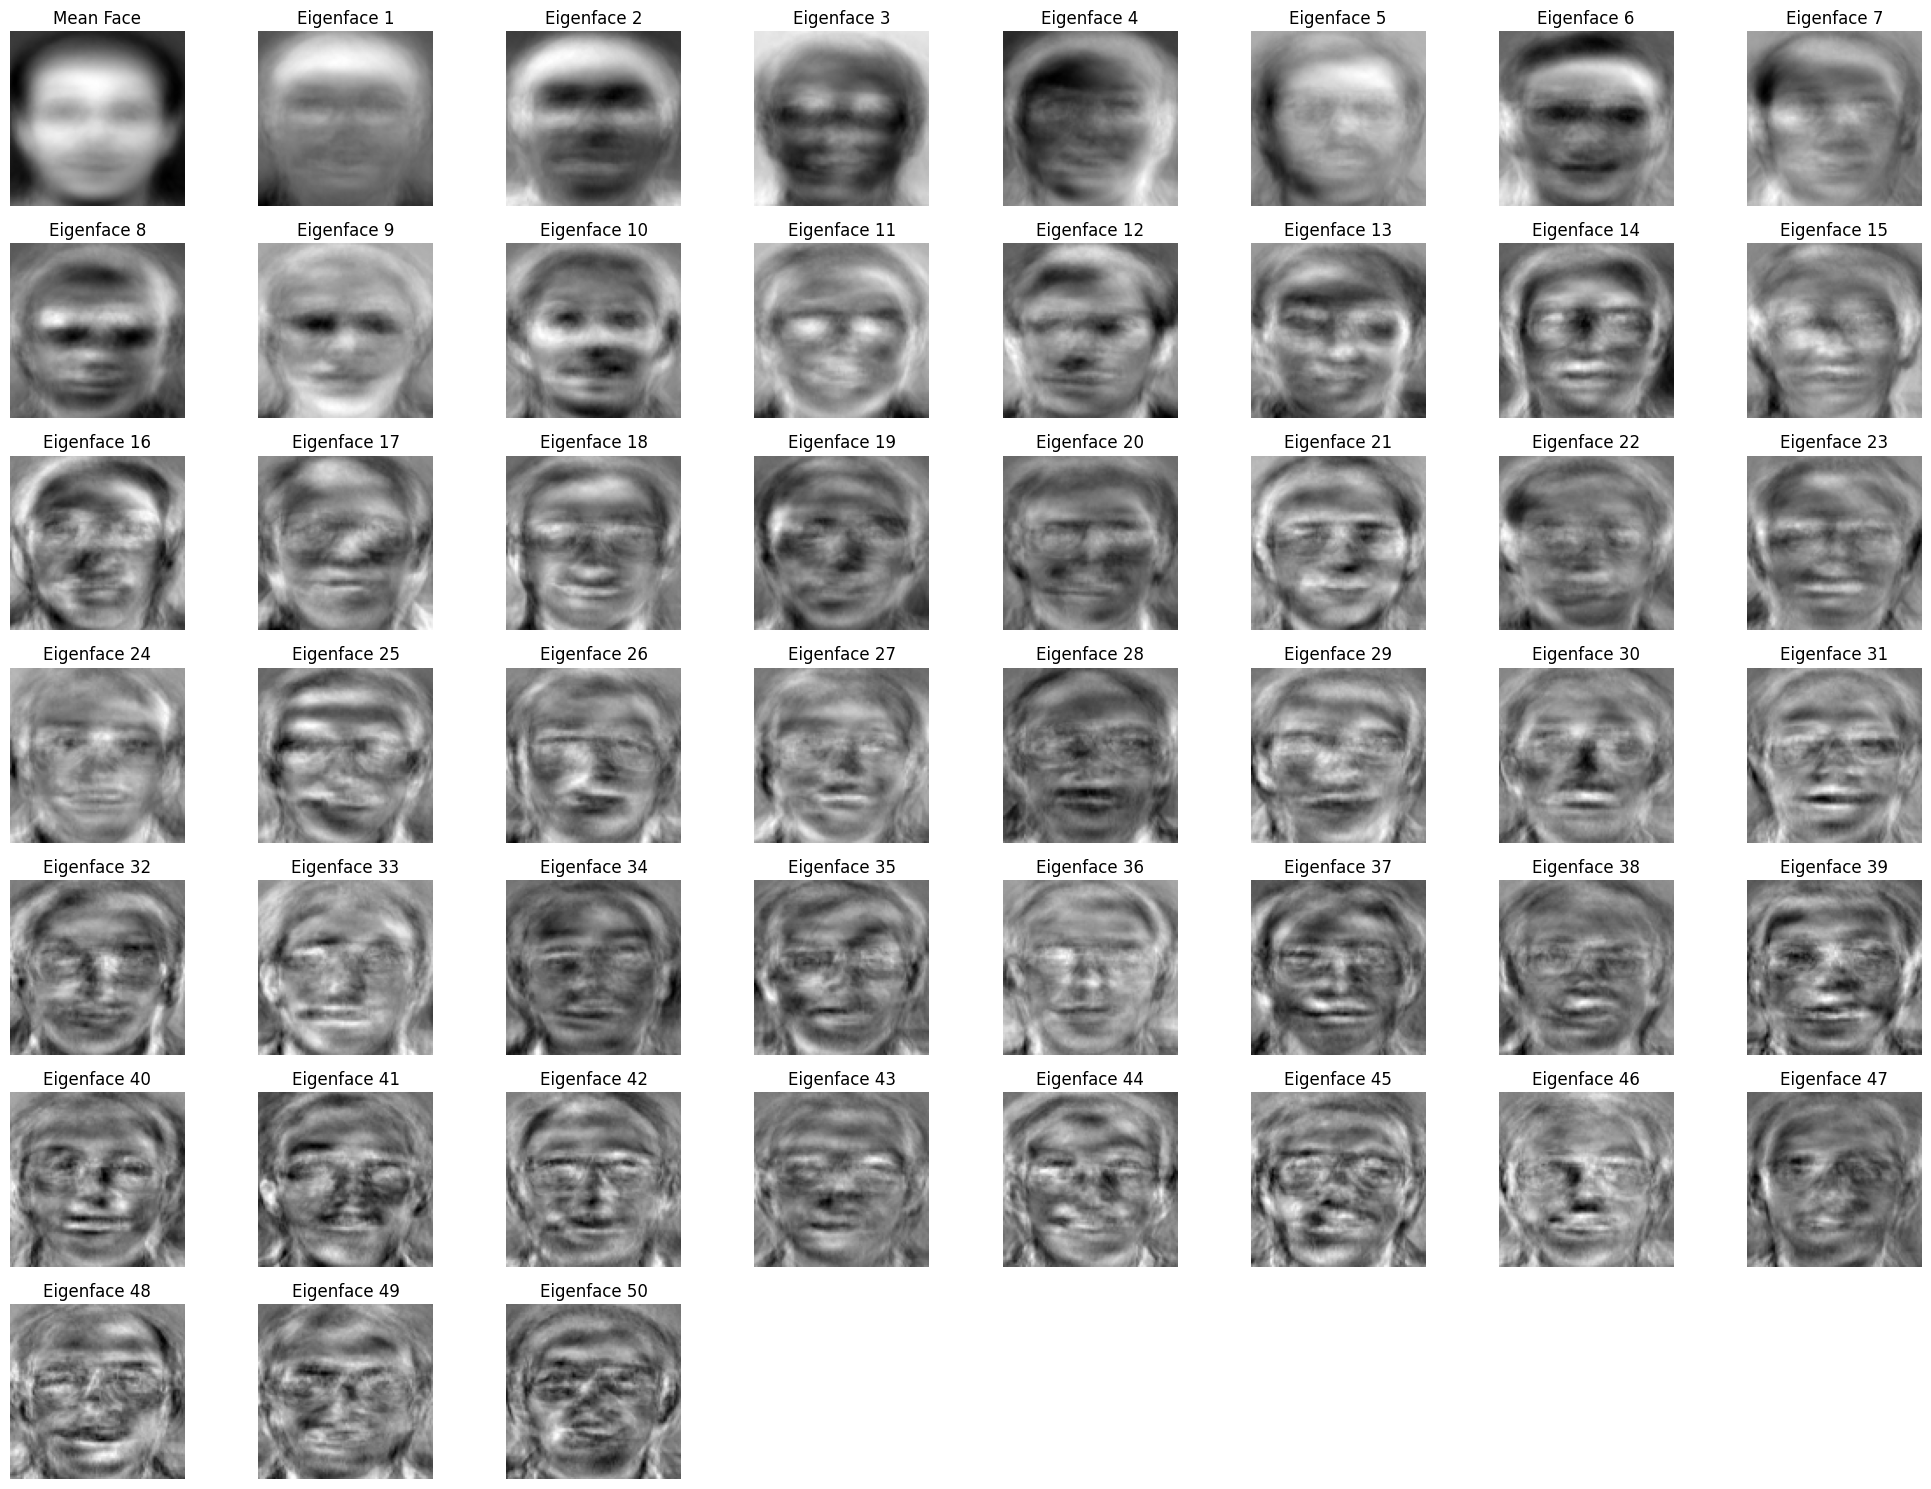

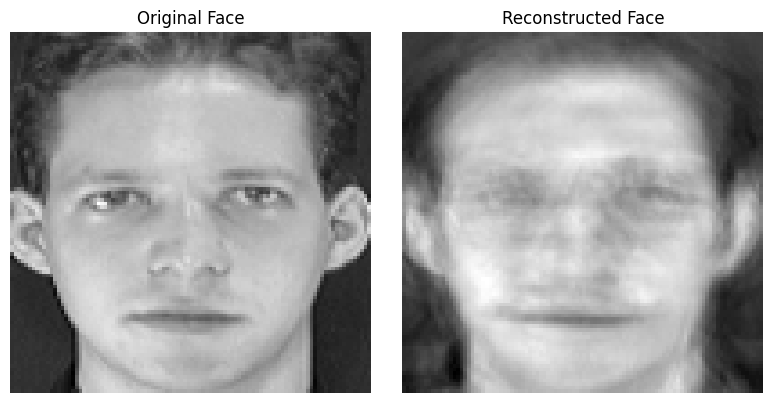

In [8]:
import matplotlib.pyplot as plt
# ---------------------------------------------------
# 7. Display Mean Face and Eigenfaces
# ---------------------------------------------------
plt.figure(figsize=(20, 15))

plt.subplot(7, 8, 1) # rows, columns and position
plt.imshow(mean_face.reshape(image_size), cmap='gray') # .reshape(100, 100) turns it back into a 2D image shape
plt.title("Mean Face")
plt.axis("off")

# These 6 eigenvectors are reshaped back into 100×100 “face-like” patterns
# Each eigenface highlights unique variations (like lighting, smile, nose shape, etc.).

# Top eigenfaces
for i in range(top_k):
    plt.subplot(7, 8, i + 2) # divides your figure into a grid of 2 rows and 4 columns (total 8 plots).
                             # The first position (1) is already used by the Mean Face,so we start from position 2 to plot Eigenface 1
    plt.imshow(eigenfaces[:, i].reshape(image_size), cmap='gray') # .reshape(100, 100) turns it back into a 2D image shape
    plt.title(f"Eigenface {i+1}") # cmap='gray' displays it in grayscale
    plt.axis("off")



plt.tight_layout()
plt.show()

# ---------------------------------------------------
# 8. Face Reconstruction using Eigenfaces
# ---------------------------------------------------
test_face = centered_data[0]
weights = test_face @ eigenfaces
reconstructed = mean_face + weights @ eigenfaces.T

# weights - Finds how strongly each eigenface contributes to this face (projection)
# project the first image into the eigenface space (find its weights)
# weights = how much of each eigenface is present in this face
# centered_data[0] → This is one flattened face (say the first one) after mean subtraction-Shape: (10000,)
# top_eigenfaces → Contains the top eigenvectors (the “basis” of our face space).
# Shape: (10000, k) where k = number of eigenfaces (say 50)
# top_eigenfaces - Columns are eigenfaces
# (1 × 10000)  @  (10000 × k)  =  (1 × k) no.of columns in first equal to the no. of rows in the second

#  reconstructed = the face that can be built using the selected eigenfaces
# You’re reversing the projection process
# top_eigenfaces.T - (k × 10000) it transpose for multiplication
# top_eigenfaces.T - Transpose (flip rows ↔ columns) Rows become eigenfaces
# (1 × k)  @  (k × 10000) no.of columns in first equal to the no. of rows in the second

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(images[0], cmap='gray')
plt.title("Original Face")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed.reshape(image_size), cmap='gray')
plt.title("Reconstructed Face")
plt.axis("off")

plt.tight_layout()
plt.show()